https://mp.weixin.qq.com/s/mW7PTofuCOQrW5e34Ei2Pw

In [1]:
import itchat
itchat.login()

ModuleNotFoundError: No module named 'itchat'

In [2]:
friends = itchat.get_friends(update=True)[0:]

### 1. 自己微信好友的男女比例

In [7]:
male = female = other = 0
for i in friends[1:]:
    sex = i["Sex"]
    if sex == 1:
        male += 1
    elif sex == 2:
        female += 1
    else:
        other += 1
total = len(friends[1:])
print("male:%.2f%%"%(float(male)/total*100))
print("female:%.2f%%"%(float(female)/total*100))
print("other:%.2f%%"%(float(other)/total*100))

male:57.89%
female:31.23%
other:10.88%


### 2. 自己微信好友的城市分布

In [8]:
#定义一个函数，用来爬取各个变量
def get_var(var):
    variable = []
    for i in friends:
        value = i[var]
        variable.append(value)
    return variable
#调用函数得到各变量，并把数据存到csv文件中，保存到桌面
NickName = get_var("NickName")
Sex = get_var('Sex')
Province = get_var('Province')
City = get_var('City')
Signature = get_var('Signature')
from pandas import DataFrame
data = {'NickName': NickName, 'Sex': Sex, 'Province': Province,
        'City': City, 'Signature': Signature}
frame = DataFrame(data)
frame.to_csv('data.csv', index=True)

### 3. 自己微信好友个性签名的自定义词云图

In [9]:
import re
siglist = []
for i in friends:
    signature = i["Signature"].strip().replace("span","").replace("class","").replace("emoji","")
    rep = re.compile("1f\d+\w*|[<>/=]")
    signature = rep.sub("", signature)
    siglist.append(signature)
text = "".join(siglist)

In [10]:
import jieba
wordlist = jieba.cut(text, cut_all=True)
word_space_split = " ".join(wordlist)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\David\AppData\Local\Temp\jieba.cache
Loading model cost 1.155 seconds.
Prefix dict has been built succesfully.


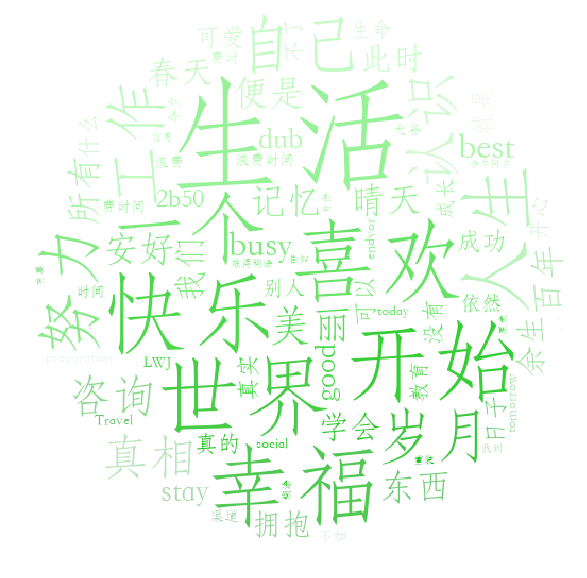

In [20]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
import numpy as np
import PIL.Image as Image
coloring = np.array(Image.open("WordCloudChinese/data/templates/bk.jpg"))
my_wordcloud = WordCloud(background_color="white", max_words=2000,
                         mask=coloring, max_font_size=60, random_state=42, scale=2,
                         font_path="WordCloudChinese/fonts/STFangSong.ttf").generate(word_space_split)

image_colors = ImageColorGenerator(coloring)
plt.figure(figsize=(60,10)) 
plt.imshow(my_wordcloud.recolor(color_func=image_colors))
plt.imshow(my_wordcloud)
plt.axis("off")

plt.show()